In [3]:
import numpy as np
import matplotlib.pyplot as plt
import optimizers as opt
import tasks as task

# Функції, що вирішують відповідні задачі

In [4]:
def solve_a1(x_a):
    t = 1

    x = np.empty(shape=(1001), dtype=np.float32)
    y = np.empty(shape=(1001), dtype=np.float32)
    z = np.empty(shape=(1001), dtype=np.float32)

    h = 2 / 1000

    z[0] = 1
    y[0] = 1
    x[0] = x_a

    for i in range(1, 1001):
        z[i] = z[i - 1] + h * ( 
            (x[i - 1] * t) ** 2 - ((y[i - 1] ** 4 + x[i - 1] ** 3 - 3 * np.sin(t * z[i - 1])) ** 2) * np.cos(z[i - 1]))
        y[i] = y[i - 1] + h * (y[i - 1] ** 4 + x[i - 1] ** 3 - 3 * np.sin(t * z[i - 1]))
        x[i] = x[i - 1] + h * z[i - 1]
        t += h

    return x, y

def solve_a5(vec):
    z_a, w_a = vec # x_prime_a, y_prime_a

    t = 1
    h = 2 / 1000

    x = np.empty(shape=(1001), dtype=np.float32)
    y = np.empty(shape=(1001), dtype=np.float32)
    z = np.empty(shape=(1001), dtype=np.float32)
    w = np.empty(shape=(1001), dtype=np.float32)

    x[0] = 2
    y[0] = -1
    z[0] = z_a
    w[0] = w_a

    for i in range(1, 1001):
        x[i] = x[i - 1] + h * z[i - 1]
        y[i] = y[i - 1] + h * w[i - 1]
        z[i] = z[i - 1] + h * (
            np.exp(- t ** 2) - 4 * np.exp(-np.abs(x[i - 1] * w[i - 1]) * np.cos(np.sin((5 * z[i - 1] ** 2) * y[i - 1] + t ** 2)) -
            np.log(3 * t ** 2 + (t * x[i - 1] + w[i - 1]) ** 2))
        )
        w[i] = w[i - 1] + h * (
            np.exp(-t) * np.cos(2 * t) + np.cos(np.abs((3 * x[i - 1] - w[i - 1]) / (z[i - 1] ** 2 + 1)) -
            np.log(10 + np.exp(-np.abs( (x[i - 1] ** 2) * (w[i - 1] ** 3) ))))
        ) 

        t += h

    return x, y

# Функція Растрігіна

Iteration: 1
Min value: 3.693e+01
Min position: [-0.0798742  -0.41283435  1.4422679   0.92557867  2.01203091 -0.07011015
  0.11545282  0.93081759 -0.3912667   2.54317697 -0.9505727  -0.90466435
  1.13511511 -1.07066671  0.35140229 -1.13812557 -0.0537185   0.12653743
  1.12734934 -1.97923002]
Iteration: 2
Min value: 2.518e+01
Min position: [ 0.01197941 -0.04609967  1.29753989  0.02055276  0.83814078 -0.16207116
  0.29543169  0.60108322  0.81465838  1.26558762 -0.77490908  0.05583159
  0.97741214 -1.83263967 -0.12467324 -1.00863821  0.42979805 -0.24836723
  0.26600876 -0.99417597]
Iteration: 3
Min value: 2.427e+01
Min position: [-0.09389452 -0.24579808  1.06002452 -0.05312435  0.85124053 -0.15946582
  0.60691927  0.89577842  0.9271441   1.28268811 -0.63664443  0.01559165
  0.86283736 -1.96704552 -0.15660065 -0.73690673  0.58749102 -0.15657296
  0.11521139 -1.04739059]
Iteration: 4
Min value: 2.356e+01
Min position: [-0.03485963 -0.18676318  1.11905941  0.00591055  0.91027542 -0.10043093


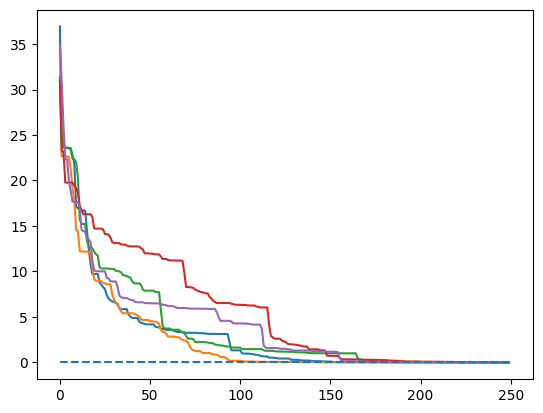

Iteration: 1
Min value: 2.903e+01
Min position: [0.38254768 0.20081752 0.5539138  0.77928873 0.0242514  0.8624078
 0.50811699 0.58051034 0.51845536 0.22198449 0.07408072 0.22259215
 0.78402566 0.28868506 0.34954396 0.87515766 0.6352637  0.67647738
 0.45250059 0.78116076]
Iteration: 2
Min value: 2.903e+01
Min position: [0.38254768 0.20081752 0.5539138  0.77928873 0.0242514  0.8624078
 0.50811699 0.58051034 0.51845536 0.22198449 0.07408072 0.22259215
 0.78402566 0.28868506 0.34954396 0.87515766 0.6352637  0.67647738
 0.45250059 0.78116076]
Iteration: 3
Min value: 2.903e+01
Min position: [0.38254768 0.20081752 0.5539138  0.77928873 0.0242514  0.8624078
 0.50811699 0.58051034 0.51845536 0.22198449 0.07408072 0.22259215
 0.78402566 0.28868506 0.34954396 0.87515766 0.6352637  0.67647738
 0.45250059 0.78116076]
Iteration: 4
Min value: 2.903e+01
Min position: [0.38254768 0.20081752 0.5539138  0.77928873 0.0242514  0.8624078
 0.50811699 0.58051034 0.51845536 0.22198449 0.07408072 0.22259215
 0.

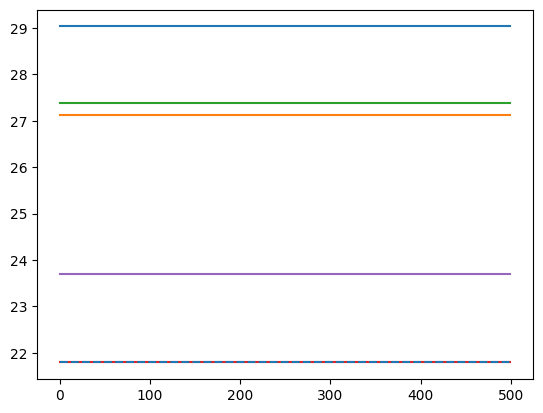

In [80]:
rastrigin = task.Rastrigin(20, 1)
ras = [0] * 2

ras_ba = opt.BA(10_000, 0.01, 0.99, rastrigin)
ras_co = opt.CO(10_000, 1, 0.5, rastrigin)

ras[0] = ras_ba.main_loop(max_iter=250, init_r=0.9, init_A=1, alpha=0.97, gamma=0.97, delta=0.9, times=5)
ras[1] = ras_co.main_loop(max_iter=500, cookoo=100, times=5)

In [81]:
print("Bat Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % ras[0])
print("Cookoo Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % ras[1])

Bat Algorithm:
	Min value: 1.37e-03	Min point: [ 6.40224827e-04  1.39419481e-03  2.07706867e-03 -2.46577922e-04
 -4.55120551e-03  1.53705494e-03  1.30376174e-03 -3.14774986e-03
 -1.14844417e-03  5.11849237e-04  1.99560377e-04 -2.45582363e-05
 -2.32376228e-03 -5.06419258e-05  7.07181806e-04 -3.30211113e-03
  1.10140980e-03  3.91850000e-04  1.94959032e-03  1.03526193e-03]
Cookoo Algorithm:
	Min value: 2.18e+01	Min point: [0.25637476 0.14300046 0.84112838 0.82441834 0.40569719 0.84776928
 0.43665792 0.14290957 0.66428158 0.84920367 0.45093448 0.02269222
 0.27594151 0.02261198 0.18993901 0.34931723 0.17851706 0.06954669
 0.84569731 0.75869005]


# Завдання 1

Iteration: 1
Min value: 5.954e-03
Min position: [-1.42021035]
Iteration: 2
Min value: 5.954e-03
Min position: [-1.42021035]
Iteration: 3
Min value: 5.954e-03
Min position: [-1.42021035]
Iteration: 4
Min value: 5.954e-03
Min position: [-1.42021035]
Iteration: 5
Min value: 5.954e-03
Min position: [-1.42021035]
Iteration: 6
Min value: 5.954e-03
Min position: [-1.42021035]
Iteration: 7
Min value: 5.954e-03
Min position: [-1.42021035]
Iteration: 8
Min value: 5.954e-03
Min position: [-1.42021035]
Iteration: 9
Min value: 5.954e-03
Min position: [-1.42021035]
Iteration: 10
Min value: 3.537e-03
Min position: [-1.41911136]
Iteration: 11
Min value: 6.919e-04
Min position: [-1.41944068]
Iteration: 12
Min value: 6.919e-04
Min position: [-1.41944068]
Iteration: 13
Min value: 6.919e-04
Min position: [-1.41944068]
Iteration: 14
Min value: 6.919e-04
Min position: [-1.41944068]
Iteration: 15
Min value: 6.919e-04
Min position: [-1.41944068]
Iteration: 16
Min value: 6.919e-04
Min position: [-1.41944068]
I

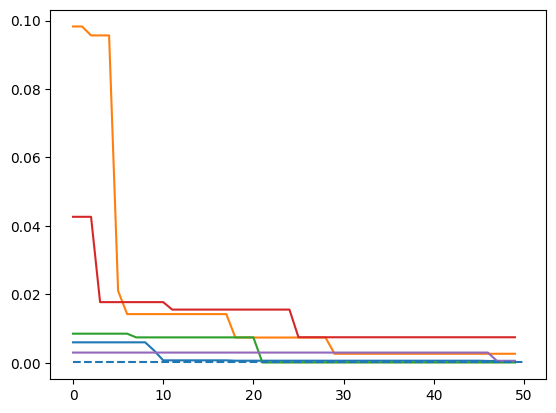

Iteration: 1
Min value: 6.447e-01
Min position: [-1.53352311]
Iteration: 2
Min value: 6.447e-01
Min position: [-1.53352311]
Iteration: 3
Min value: 6.447e-01
Min position: [-1.53352311]
Iteration: 4
Min value: 1.581e-01
Min position: [0.247833]
Iteration: 5
Min value: 1.581e-01
Min position: [0.247833]
Iteration: 6
Min value: 1.358e-01
Min position: [-1.43624565]
Iteration: 7
Min value: 2.815e-02
Min position: [-1.42281011]
Iteration: 8
Min value: 2.815e-02
Min position: [-1.42281011]
Iteration: 9
Min value: 2.815e-02
Min position: [-1.42281011]
Iteration: 10
Min value: 2.815e-02
Min position: [-1.42281011]
Iteration: 11
Min value: 2.815e-02
Min position: [-1.42281011]
Iteration: 12
Min value: 2.815e-02
Min position: [-1.42281011]
Iteration: 13
Min value: 2.815e-02
Min position: [-1.42281011]
Iteration: 14
Min value: 2.815e-02
Min position: [-1.42281011]
Iteration: 15
Min value: 2.815e-02
Min position: [-1.42281011]
Iteration: 16
Min value: 2.815e-02
Min position: [-1.42281011]
Iterati

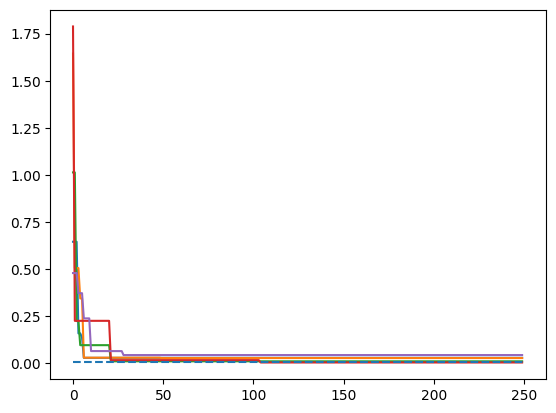

In [82]:
'''
Типи:
0 - Модуль різниці
1 - Квадрат різниці
'''

xs = [0] * 4
objective = task.Assignment1(1000, 0)
test_BA = opt.BA(100, 0.01, 0.99, objective)
test_CO = opt.CO(1_000, 1, 0.5, objective)

xs[0] = test_BA.main_loop(max_iter=50, init_r=0.9, init_A=1, alpha=0.97, gamma=0.97, delta=0.9, times=5)
xs[1] = test_CO.main_loop(max_iter=250, cookoo=10, times=5)

In [83]:
print("Bat Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % xs[0])
print("Cookoo Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % xs[1])

Bat Algorithm:
	Min value: 6.63e-05	Min point: [-1.41952701]
Cookoo Algorithm:
	Min value: 3.52e-03	Min point: [-1.41911349]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7964\329725764.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[0] = x_a


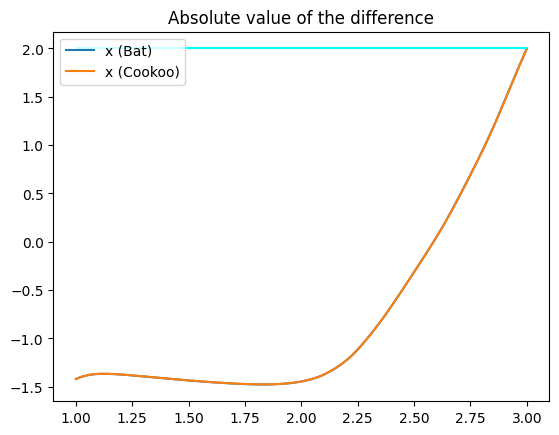

6.628036499023438e-05
[-1.41952701]


In [84]:
t = np.linspace(1, 3, 1001)

x_b, _ = solve_a1(xs[0][1])
x_c, _ = solve_a1(xs[1][1])

plt.title('Absolute value of the difference')
plt.plot(t, x_b, label="x (Bat)")
plt.plot(t, x_c, label="x (Cookoo)")
plt.hlines(xmin=1, xmax=3, y=2, color="cyan")
plt.legend()
plt.show()
print(*xs[0],sep='\n')

Iteration: 1
Min value: 3.710e-03
Min position: [-1.42673928]
Iteration: 2
Min value: 3.475e-05
Min position: [-1.41883952]
Iteration: 3
Min value: 3.475e-05
Min position: [-1.41883952]
Iteration: 4
Min value: 3.475e-05
Min position: [-1.41883952]
Iteration: 5
Min value: 3.475e-05
Min position: [-1.41883952]
Iteration: 6
Min value: 3.475e-05
Min position: [-1.41883952]
Iteration: 7
Min value: 3.475e-05
Min position: [-1.41883952]
Iteration: 8
Min value: 3.475e-05
Min position: [-1.41883952]
Iteration: 9
Min value: 3.475e-05
Min position: [-1.41883952]
Iteration: 10
Min value: 3.475e-05
Min position: [-1.41883952]
Iteration: 11
Min value: 3.475e-05
Min position: [-1.41883952]
Iteration: 12
Min value: 3.475e-05
Min position: [-1.41883952]
Iteration: 13
Min value: 3.475e-05
Min position: [-1.41883952]
Iteration: 14
Min value: 1.057e-05
Min position: [-1.41989686]
Iteration: 15
Min value: 1.057e-05
Min position: [-1.41989686]
Iteration: 16
Min value: 1.057e-05
Min position: [-1.41989686]
I

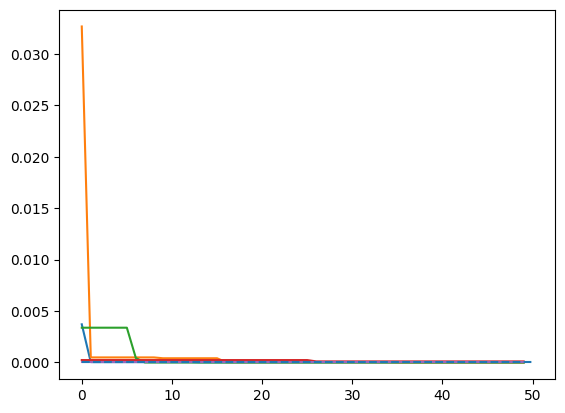

Iteration: 1
Min value: 4.848e+00
Min position: [-0.98055806]
Iteration: 2
Min value: 4.630e+00
Min position: [-1.02373736]
Iteration: 3
Min value: 3.665e+00
Min position: [-0.25038575]
Iteration: 4
Min value: 7.131e-01
Min position: [-1.5862294]
Iteration: 5
Min value: 2.965e-01
Min position: [0.27548039]
Iteration: 6
Min value: 2.965e-01
Min position: [0.27548039]
Iteration: 7
Min value: 2.965e-01
Min position: [0.27548039]
Iteration: 8
Min value: 2.965e-01
Min position: [0.27548039]
Iteration: 9
Min value: 2.965e-01
Min position: [0.27548039]
Iteration: 10
Min value: 2.965e-01
Min position: [0.27548039]
Iteration: 11
Min value: 2.965e-01
Min position: [0.27548039]
Iteration: 12
Min value: 2.003e-01
Min position: [-1.48790547]
Iteration: 13
Min value: 2.003e-01
Min position: [-1.48790547]
Iteration: 14
Min value: 2.003e-01
Min position: [-1.48790547]
Iteration: 15
Min value: 2.003e-01
Min position: [-1.48790547]
Iteration: 16
Min value: 7.838e-03
Min position: [-1.40951997]
Iteration

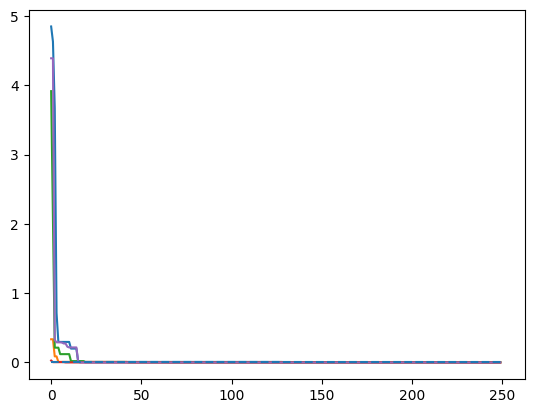

In [85]:
objective = task.Assignment1(1000, 1)
test_BA = opt.BA(100, 0.01, 0.99, objective)
test_CO = opt.CO(1_000, 1, 0.5, objective)

xs[2] = test_BA.main_loop(max_iter=50, init_r=0.9, init_A=1, alpha=0.97, gamma=0.97, delta=0.9, times=5)
xs[3] = test_CO.main_loop(max_iter=250, cookoo=10, times=5)

In [86]:
print("Bat Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % xs[2])
print("Cookoo Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % xs[3])

Bat Algorithm:
	Min value: 3.26e-07	Min point: [0.23705546]
Cookoo Algorithm:
	Min value: 2.84e-06	Min point: [0.23713073]


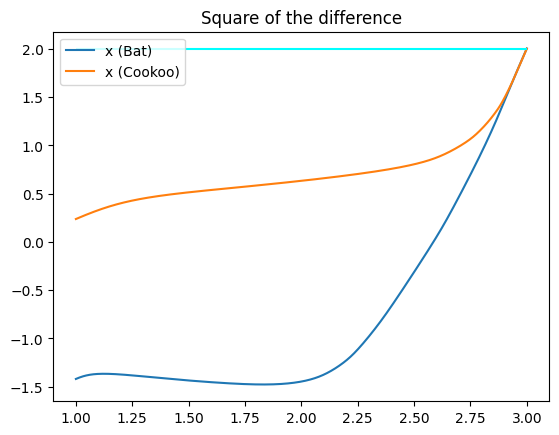

In [8]:
x_b, _ = solve_a1(-1.42001127)
x_c, _ = solve_a1(0.23713073)

plt.title('Square of the difference')
plt.plot(np.linspace(1, 3, 1001), x_b, label="x (Bat)")
plt.plot(np.linspace(1, 3, 1001), x_c, label="x (Cookoo)")
plt.hlines(xmin=1, xmax=3, y=2, color="cyan")
plt.legend()
plt.show()
#print(*xs[0],sep='\n')

Iteration: 1
Min value: 2.868e-01
Min position: [ 1.42499826 -0.50358136]
Iteration: 2
Min value: 1.525e-01
Min position: [ 1.53277428 -0.58440336]
Iteration: 3
Min value: 3.521e-02
Min position: [ 1.50039418 -0.61678346]
Iteration: 4
Min value: 3.175e-02
Min position: [ 1.50105255 -0.61612508]
Iteration: 5
Min value: 3.175e-02
Min position: [ 1.50105255 -0.61612508]
Iteration: 6
Min value: 3.175e-02
Min position: [ 1.50105255 -0.61612508]
Iteration: 7
Min value: 3.175e-02
Min position: [ 1.50105255 -0.61612508]
Iteration: 8
Min value: 2.478e-02
Min position: [ 1.50237398 -0.61480366]
Iteration: 9
Min value: 2.478e-02
Min position: [ 1.50237398 -0.61480366]
Iteration: 10
Min value: 2.478e-02
Min position: [ 1.50237398 -0.61480366]
Iteration: 11
Min value: 2.478e-02
Min position: [ 1.50237398 -0.61480366]
Iteration: 12
Min value: 2.478e-02
Min position: [ 1.50237398 -0.61480366]
Iteration: 13
Min value: 2.478e-02
Min position: [ 1.50237398 -0.61480366]
Iteration: 14
Min value: 2.478e-02

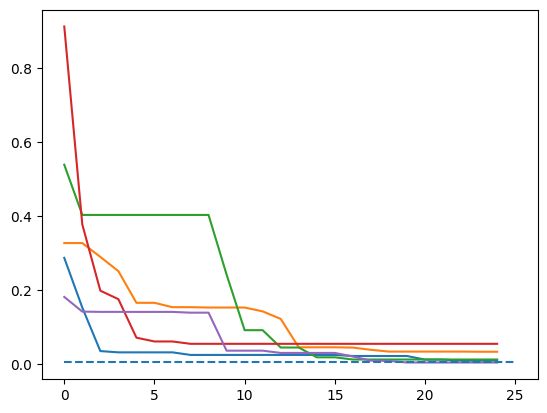

Iteration: 1
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 2
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 3
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 4
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 5
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 6
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 7
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 8
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 9
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 10
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 11
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 12
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 13
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 14
Min value: 2.622e+00
Min position: [0.207692  0.8758832]
Iteration: 15
M

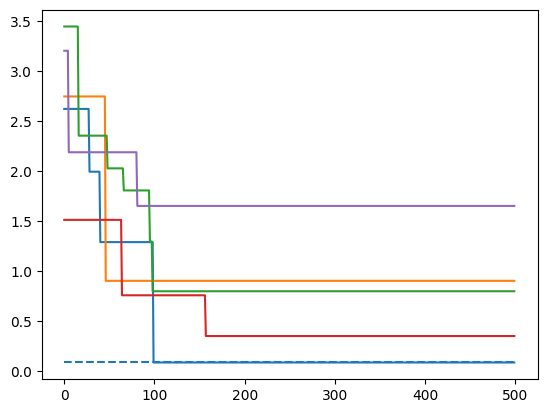

In [88]:
'''
Типи:
0 - Модуль різниці
1 - Квадрат різниці
2 - Максимум різниці
'''
values = [0] * 6

objective = task.Assignment5(query_type=0)
test_BA = opt.BA(1_000, 0.01, 0.99, objective)
test_CO = opt.CO(10_000, 1, 0.5, objective)

values[0] = min_point_bat1, min_val_bat1 = test_BA.main_loop(max_iter=25, init_r=0.9, init_A=1, alpha=0.97, gamma=0.97, delta=0.9, times=5)
values[1] = min_point_co1, min_val_co1 = test_CO.main_loop(max_iter=500, cookoo=100, times=5)

In [89]:
print("Bat Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % (min_point_bat1, min_val_bat1))
print("Cookoo Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % (min_point_co1, min_val_co1))

Bat Algorithm:
	Min value: 4.42e-03	Min point: [ 1.51099552 -0.6252784 ]
Cookoo Algorithm:
	Min value: 8.88e-02	Min point: [ 1.49488771 -0.6381347 ]


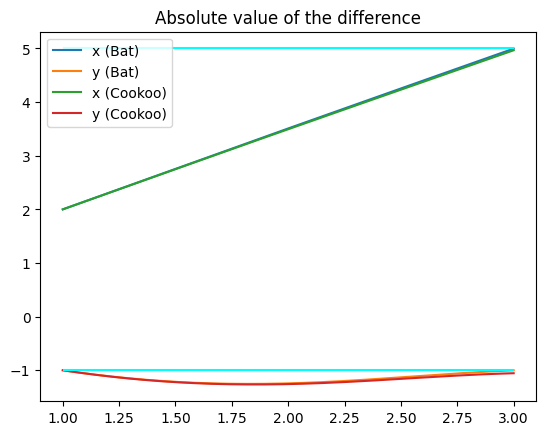

In [90]:
'''
x(3) = 5
y(3) = -1 
'''
x_b, y_b = solve_a5(min_val_bat1)
x_c, y_c = solve_a5(min_val_co1)

plt.title('Absolute value of the difference')
plt.plot(t, x_b, label="x (Bat)")
plt.plot(t, y_b, label="y (Bat)")
plt.plot(t, x_c, label="x (Cookoo)")
plt.plot(t, y_c, label="y (Cookoo)")
plt.hlines(xmin=1, xmax=3, y=[5, -1], color="cyan")
plt.legend()
plt.show()

Iteration: 1
Min value: 2.488e-02
Min position: [ 1.52810572 -0.55274671]
Iteration: 2
Min value: 7.588e-03
Min position: [ 1.5069477  -0.57390473]
Iteration: 3
Min value: 3.360e-03
Min position: [ 1.4892283  -0.59162412]
Iteration: 4
Min value: 3.360e-03
Min position: [ 1.4892283  -0.59162412]
Iteration: 5
Min value: 3.360e-03
Min position: [ 1.4892283  -0.59162412]
Iteration: 6
Min value: 3.360e-03
Min position: [ 1.4892283  -0.59162412]
Iteration: 7
Min value: 3.358e-03
Min position: [ 1.48817083 -0.59268159]
Iteration: 8
Min value: 3.358e-03
Min position: [ 1.48817083 -0.59268159]
Iteration: 9
Min value: 3.358e-03
Min position: [ 1.48817083 -0.59268159]
Iteration: 10
Min value: 1.734e-03
Min position: [ 1.49811347 -0.62652189]
Iteration: 11
Min value: 1.359e-04
Min position: [ 1.5158053  -0.62996096]
Iteration: 12
Min value: 1.359e-04
Min position: [ 1.5158053  -0.62996096]
Iteration: 13
Min value: 1.359e-04
Min position: [ 1.5158053  -0.62996096]
Iteration: 14
Min value: 1.359e-04

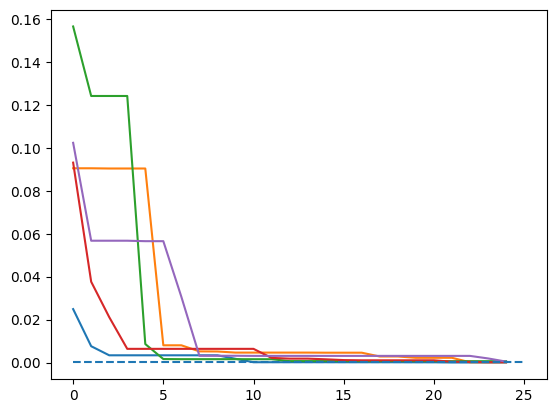

Iteration: 1
Min value: 3.621e+00
Min position: [ 2.4278068  -0.41627175]
Iteration: 2
Min value: 3.621e+00
Min position: [ 2.4278068  -0.41627175]
Iteration: 3
Min value: 3.621e+00
Min position: [ 2.4278068  -0.41627175]
Iteration: 4
Min value: 3.621e+00
Min position: [ 2.4278068  -0.41627175]
Iteration: 5
Min value: 3.621e+00
Min position: [ 2.4278068  -0.41627175]
Iteration: 6
Min value: 3.621e+00
Min position: [ 2.4278068  -0.41627175]
Iteration: 7
Min value: 3.621e+00
Min position: [ 2.4278068  -0.41627175]
Iteration: 8
Min value: 3.621e+00
Min position: [ 2.4278068  -0.41627175]
Iteration: 9
Min value: 3.621e+00
Min position: [ 2.4278068  -0.41627175]
Iteration: 10
Min value: 3.621e+00
Min position: [ 2.4278068  -0.41627175]
Iteration: 11
Min value: 3.621e+00
Min position: [ 2.4278068  -0.41627175]
Iteration: 12
Min value: 3.029e+00
Min position: [ 1.63389111 -1.53381663]
Iteration: 13
Min value: 3.029e+00
Min position: [ 1.63389111 -1.53381663]
Iteration: 14
Min value: 3.029e+00

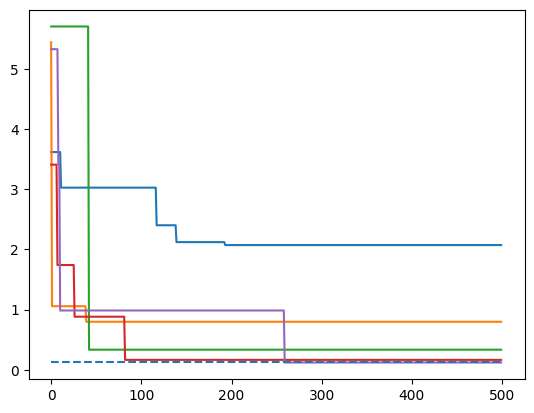

In [91]:
objective = task.Assignment5(query_type=1)
test_BA = opt.BA(1_000, 0.01, 0.99, objective)
test_CO = opt.CO(10_000, 1, 0.5, objective)

values[2] = min_point_bat2, min_val_bat2 = test_BA.main_loop(max_iter=25, init_r=0.9, init_A=1, alpha=0.97, gamma=0.97, delta=0.9, times=5)
values[3] = min_point_co2, min_val_co2 = test_CO.main_loop(max_iter=500, cookoo=100, times=5)

In [92]:
print("Bat Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % (min_point_bat2, min_val_bat2))
print("Cookoo Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % (min_point_co2, min_val_co2))

Bat Algorithm:
	Min value: 1.70e-05	Min point: [ 1.51262096 -0.62791787]
Cookoo Algorithm:
	Min value: 1.20e-01	Min point: [ 1.42549233 -0.41687499]


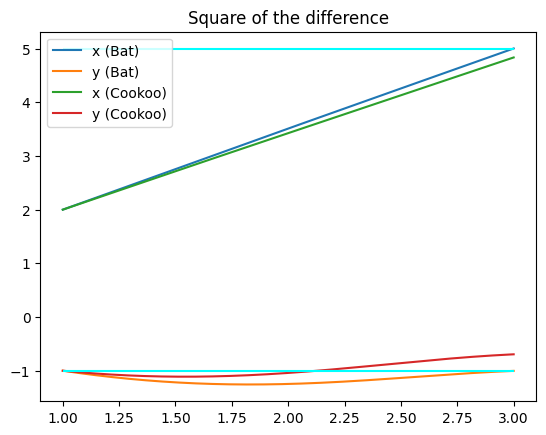

In [93]:
'''
x(3) = 5
y(3) = -1 
'''
x_b, y_b = solve_a5(min_val_bat2)
x_c, y_c = solve_a5(min_val_co2)

plt.title('Square of the difference')
plt.plot(t, x_b, label="x (Bat)")
plt.plot(t, y_b, label="y (Bat)")
plt.plot(t, x_c, label="x (Cookoo)")
plt.plot(t, y_c, label="y (Cookoo)")
plt.hlines(xmin=1, xmax=3, y=[5, -1], color="cyan")
plt.legend()
plt.show()

Iteration: 1
Min value: 3.428e-01
Min position: [ 1.54108066 -0.8322314 ]
Iteration: 2
Min value: 9.599e-02
Min position: [ 1.54279692 -0.64341157]
Iteration: 3
Min value: 9.599e-02
Min position: [ 1.54279692 -0.64341157]
Iteration: 4
Min value: 5.938e-02
Min position: [ 1.52833007 -0.65787842]
Iteration: 5
Min value: 5.938e-02
Min position: [ 1.52833007 -0.65787842]
Iteration: 6
Min value: 4.438e-02
Min position: [ 1.52210454 -0.66410395]
Iteration: 7
Min value: 4.336e-02
Min position: [ 1.52167288 -0.6645356 ]
Iteration: 8
Min value: 1.994e-02
Min position: [ 1.50463125 -0.61527694]
Iteration: 9
Min value: 1.994e-02
Min position: [ 1.50463125 -0.61527694]
Iteration: 10
Min value: 1.994e-02
Min position: [ 1.50463125 -0.61527694]
Iteration: 11
Min value: 1.994e-02
Min position: [ 1.50463125 -0.61527694]
Iteration: 12
Min value: 1.994e-02
Min position: [ 1.50463125 -0.61527694]
Iteration: 13
Min value: 1.994e-02
Min position: [ 1.50463125 -0.61527694]
Iteration: 14
Min value: 1.589e-02

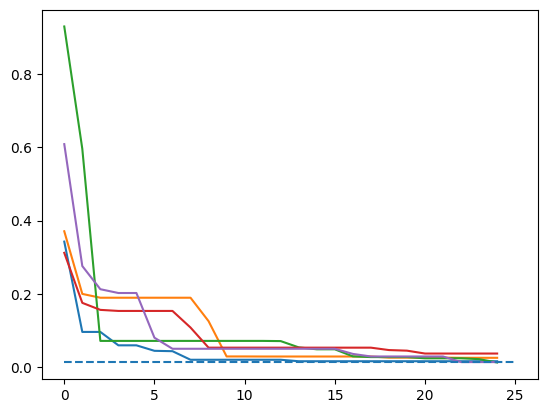

Iteration: 1
Min value: 2.569e+00
Min position: [0.25245791 0.48713474]
Iteration: 2
Min value: 1.343e+00
Min position: [0.88833375 0.01376418]
Iteration: 3
Min value: 1.343e+00
Min position: [0.88833375 0.01376418]
Iteration: 4
Min value: 1.343e+00
Min position: [0.88833375 0.01376418]
Iteration: 5
Min value: 1.343e+00
Min position: [0.88833375 0.01376418]
Iteration: 6
Min value: 1.343e+00
Min position: [0.88833375 0.01376418]
Iteration: 7
Min value: 1.343e+00
Min position: [0.88833375 0.01376418]
Iteration: 8
Min value: 1.343e+00
Min position: [0.88833375 0.01376418]
Iteration: 9
Min value: 1.343e+00
Min position: [0.88833375 0.01376418]
Iteration: 10
Min value: 1.343e+00
Min position: [0.88833375 0.01376418]
Iteration: 11
Min value: 1.343e+00
Min position: [0.88833375 0.01376418]
Iteration: 12
Min value: 1.343e+00
Min position: [0.88833375 0.01376418]
Iteration: 13
Min value: 1.343e+00
Min position: [0.88833375 0.01376418]
Iteration: 14
Min value: 1.343e+00
Min position: [0.88833375

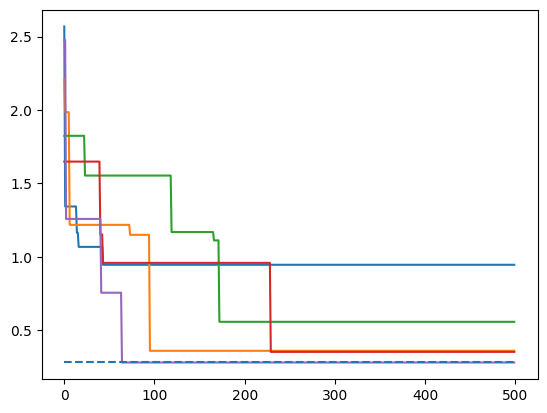

In [94]:
objective = task.Assignment5(query_type=2)
test_BA = opt.BA(1_000, 0.01, 0.99, objective)
test_CO = opt.CO(10_000, 1, 0.5, objective)

values[4] = min_point_bat3, min_val_bat3 = test_BA.main_loop(max_iter=25, init_r=0.9, init_A=1, alpha=0.97, gamma=0.97, delta=0.9, times=5)
values[5] = min_point_co3, min_val_co3 = test_CO.main_loop(max_iter=500, cookoo=100, times=5)

In [95]:
print("Bat Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % (min_point_bat3, min_val_bat3))
print("Cookoo Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % (min_point_co3, min_val_co3))

Bat Algorithm:
	Min value: 1.25e-02	Min point: [ 1.50940321 -0.62950537]
Cookoo Algorithm:
	Min value: 2.80e-01	Min point: [ 1.59730592 -0.84547862]


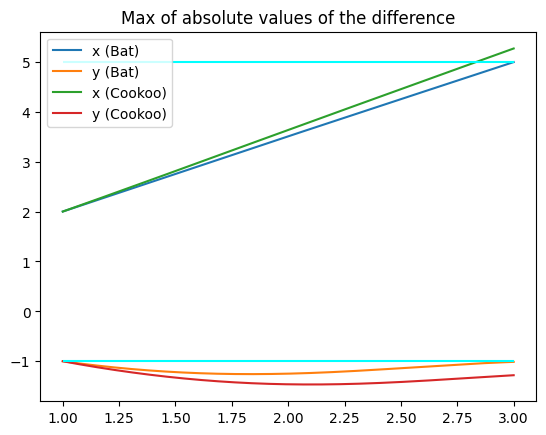

In [96]:
'''
x(3) = 5
y(3) = -1 
'''
x_b, y_b = solve_a5(min_val_bat3)
x_c, y_c = solve_a5(min_val_co3)

plt.title('Max of absolute values of the difference')
plt.plot(t, x_b, label="x (Bat)")
plt.plot(t, y_b, label="y (Bat)")
plt.plot(t, x_c, label="x (Cookoo)")
plt.plot(t, y_c, label="y (Cookoo)")
plt.hlines(xmin=1, xmax=3, y=[5, -1], color="cyan")
plt.legend()
plt.show()